# BA820 Project M2: Mapping the Economic Burden of Childcare Across US Counties

**Project M2 Question 1**

**Section and Team Number:** B1 Team 9

**Name:** Kara Liao

## Upload Data

In [2]:
from google.colab import data_table
from google.colab import drive
import pandas as pd

# Enable the interactive table feature
data_table.enable_dataframe_formatter()

# Access Google Drive
drive.mount('/content/drive')

# Read the CSV from your Drive
df = pd.read_csv("/content/drive/MyDrive/2026 Spring/unsupervised/project/childcare_costs.csv")

df.head()

Mounted at /content/drive


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [3]:
counties = pd.read_csv('/content/drive/MyDrive/2026 Spring/unsupervised/project/counties.csv')
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


## Data Preprocessing

In [4]:
childcare = df.merge(counties, on='county_fips_code', how='left')

In [5]:
df.columns

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'],
      dtype='object')

In [6]:
childcare = childcare[
    (childcare["mc_infant"] > 0) &
    (childcare["mhi_2018"] > 0)
]

In [7]:
childcare.shape
childcare[["mc_infant","mhi_2018"]].describe()

,mc_infant,mhi_2018
count,23593.000000,23593.000000
mean,146.051770,50631.312692
std,53.698566,13407.444469
min,27.730000,19841.920000
25%,108.750000,41998.000000
50%,134.500000,48634.920000
75%,166.330000,56421.300000
max,470.000000,136268.000000


In [8]:
childcare.isna().sum().sort_values(ascending=False)

,0
mfccsa,251
mfcc_preschool,251
mfcc_infant,251
mfcc_toddler,251
county_fips_code,0
...,...
mc_preschool,0
mc_toddler,0
county_name,0
state_name,0


In [9]:
childcare_clean = childcare.dropna(
    subset=["mfcc_infant", "mfcc_toddler", "mfcc_preschool"]
)

In [10]:
childcare_clean.isna().sum().sort_values(ascending=False)

,0
county_fips_code,0
study_year,0
unr_16,0
funr_16,0
munr_16,0
...,...
mfcc_toddler,0
mfcc_preschool,0
county_name,0
state_name,0


In [11]:
childcare_clean.columns

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool',
       'county_name', 'state_n

## EDA

### Do different childcare cost types move together, suggesting shared affordability patterns across counties?

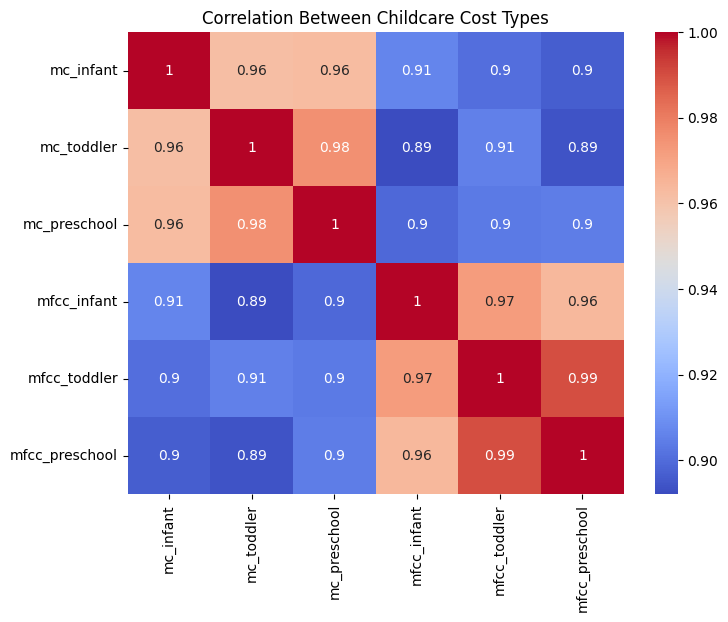

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

cost_cols = [
    'mc_infant',
    'mc_toddler',
    'mc_preschool',
    'mfcc_infant',
    'mfcc_toddler',
    'mfcc_preschool'
]

corr = childcare_clean[cost_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Childcare Cost Types')
plt.show()


### How uneven is the distribution of childcare affordability burden across counties?

/tmp/ipython-input-1035903566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childcare_clean['total_cost_index'] = (


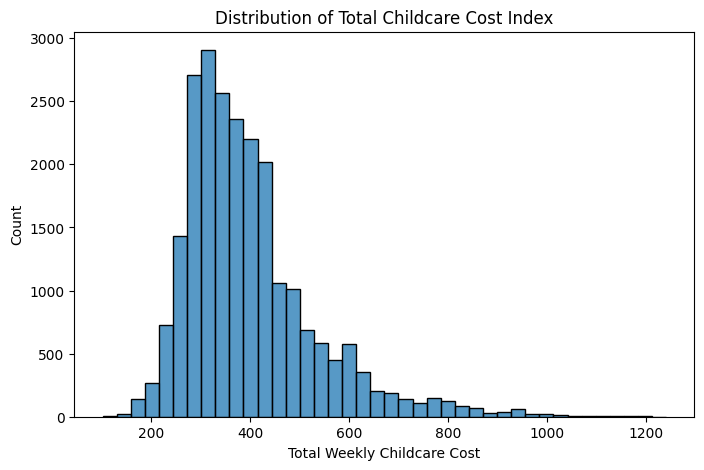

In [30]:
childcare_clean['total_cost_index'] = (
    childcare_clean['mc_infant'] +
    childcare_clean['mc_toddler'] +
    childcare_clean['mc_preschool']
)

plt.figure(figsize=(8,5))
sns.histplot(childcare_clean['total_cost_index'], bins=40)
plt.title('Distribution of Total Childcare Cost Index')
plt.xlabel('Total Weekly Childcare Cost')
plt.show()


### Which states exhibit the highest average childcare affordability burden?

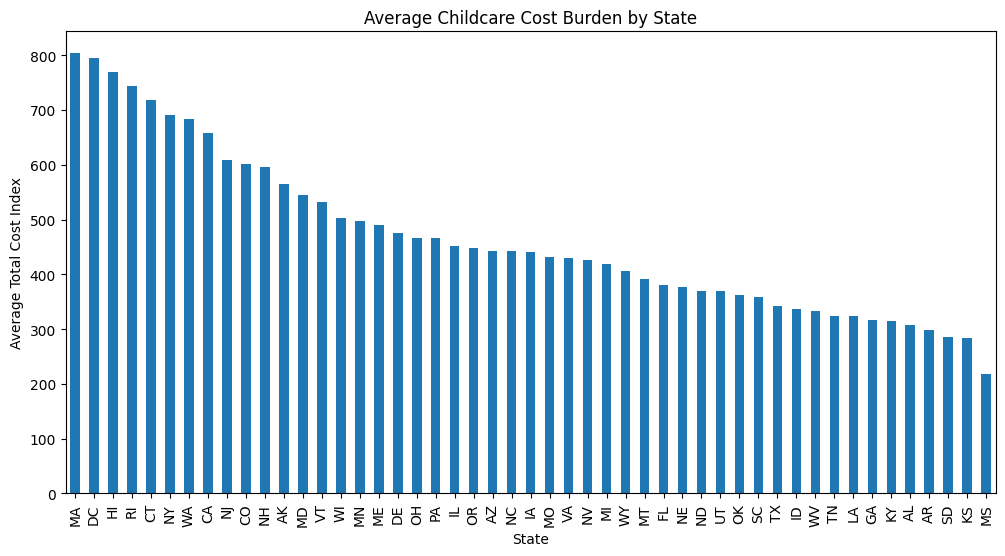

In [32]:
state_summary = (
    childcare_clean
    .groupby('state_abbreviation')['total_cost_index']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))

state_summary.plot(kind='bar')

plt.title('Average Childcare Cost Burden by State')
plt.ylabel('Average Total Cost Index')
plt.xlabel('State')
plt.xticks(rotation=90)

plt.show()


### How much variation exists within states, and do counties inside the same state form natural subgroups?

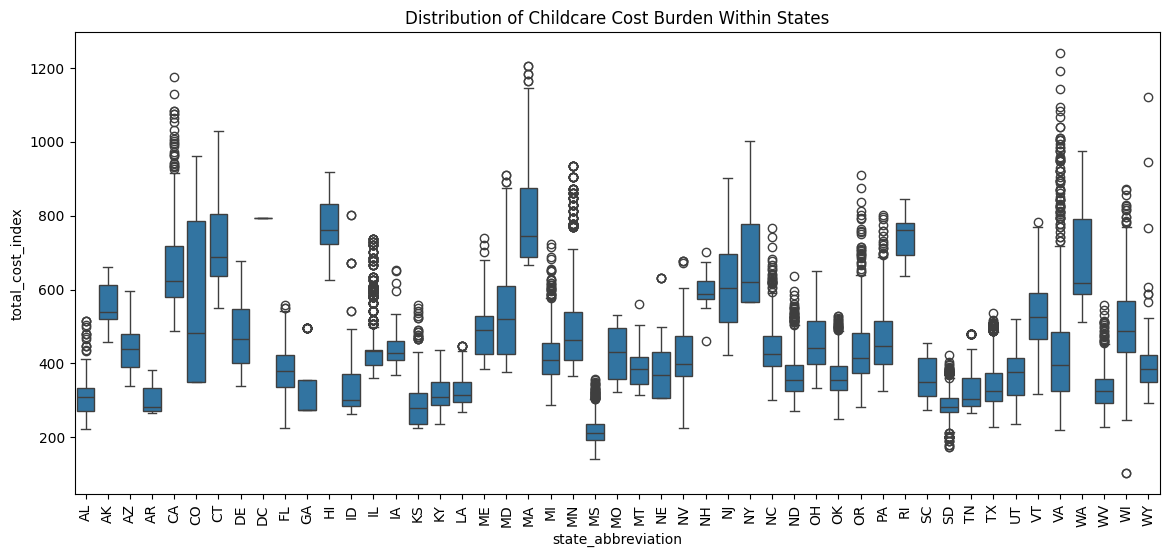

In [33]:
plt.figure(figsize=(14,6))

sns.boxplot(
    data=childcare_clean,
    x='state_abbreviation',
    y='total_cost_index'
)

plt.xticks(rotation=90)
plt.title('Distribution of Childcare Cost Burden Within States')
plt.show()


# Feature Selection and Engineering for Clustering

In [45]:
features = [
    "mc_infant",
    "mc_toddler",
    "mc_preschool",
    "mfcc_infant",
    "mfcc_toddler",
    "mfcc_preschool"
]

X = childcare_clean[features]

X.head()


,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,104.95,104.95,85.92,83.45,83.45,81.40
1,105.11,105.11,87.59,87.39,87.39,85.68
2,105.28,105.28,89.26,91.33,91.33,89.96
3,105.45,105.45,90.93,95.28,95.28,94.25
4,105.61,105.61,92.60,99.22,99.22,98.53


In [46]:
childcare_clean[features].isna().sum()

,0
mc_infant,0
mc_toddler,0
mc_preschool,0
mfcc_infant,0
mfcc_toddler,0
mfcc_preschool,0


I create affordability ratios to capture the relationship between childcare costs and income. These engineered features better represent financial burden than raw costs alone.

In [83]:
childcare_clean.loc[:, "afford_infant"] = childcare_clean["mc_infant"] / childcare_clean["mhi_2018"]
childcare_clean.loc[:, "afford_toddler"] = childcare_clean["mc_toddler"] / childcare_clean["mhi_2018"]
childcare_clean.loc[:, "afford_preschool"] = childcare_clean["mc_preschool"] / childcare_clean["mhi_2018"]

childcare_clean.loc[:, "total_cost_index"] = (childcare_clean["mc_infant"] + childcare_clean["mc_toddler"] + childcare_clean["mc_preschool"])

# Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Elbow Method

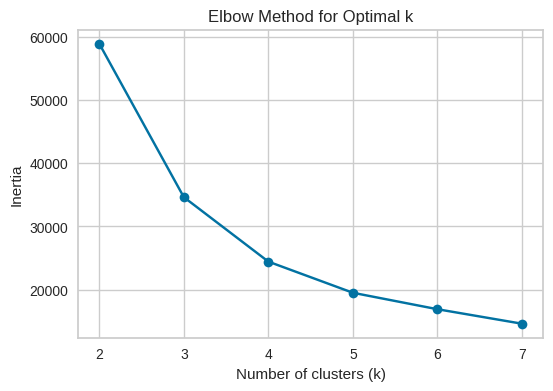

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


# Clustering

Check different silhouette score

In [61]:
from sklearn.metrics import silhouette_score

for k in [3,4,5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score}")


k=3, silhouette score=0.4817288428550766
k=4, silhouette score=0.44621844978765746
k=5, silhouette score=0.3939990579654434


Use K mean = 3

In [79]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

childcare_clean['cluster'] = clusters


/tmp/ipython-input-747843872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childcare_clean['cluster'] = clusters


Check cluster sizes

In [80]:
childcare_clean['cluster'].value_counts().sort_index()

,count
cluster,
0,12005
1,2328
2,9009


Cluster summary table

In [64]:
cluster_summary = childcare_clean.groupby('cluster').mean(numeric_only=True)

important_cols = ['mc_infant', 'mc_toddler', 'mc_preschool', 'infant_afford', 'toddler_afford', 'preschool_afford', 'total_cost_index', 'mhi_2018']
cluster_summary[important_cols]


,mc_infant,mc_toddler,mc_preschool,infant_afford,toddler_afford,preschool_afford,total_cost_index,mhi_2018
cluster,,,,,,,,
0,109.543587,100.622507,95.823061,0.002535,0.002328,0.002221,305.989155,44736.336314
1,266.030713,224.687766,205.400571,0.004092,0.003454,0.003149,696.119051,68212.114781
2,162.774016,144.922912,135.142966,0.003137,0.002795,0.002605,442.839893,53418.033994


Compare how clusters differ in infant, toddler, and preschool expenses.

In [81]:
cost_cols = [
    'mfcc_infant',
    'mfcc_toddler',
    'mfcc_preschool'
]

cluster_summary[cost_cols].sort_values('mfcc_infant', ascending=False)



,mfcc_infant,mfcc_toddler,mfcc_preschool
cluster,,,
3,201.546376,185.627057,180.452780
1,149.304380,140.290580,136.226340
2,115.705044,109.446007,106.659846
0,86.261941,81.230478,79.784206


Boxplot of cost burden by cluster

Text(0.5, 1.0, 'Cost burden by cluster')

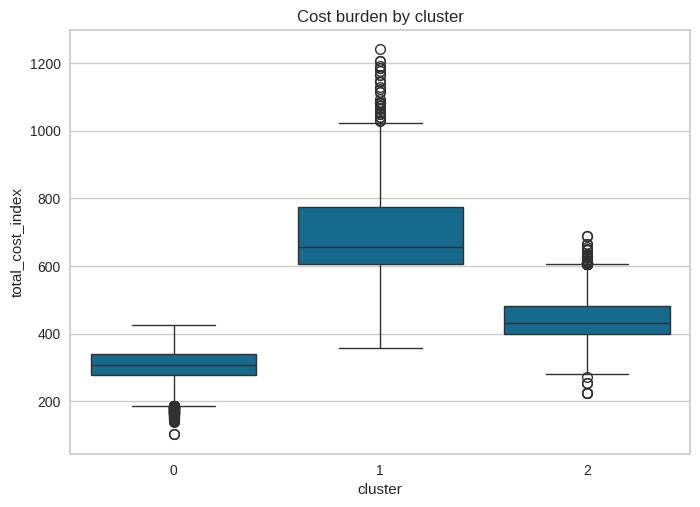

In [67]:
sns.boxplot(x='cluster', y='total_cost_index', data=childcare_clean)
plt.title('Cost burden by cluster')


Silhouette visualization

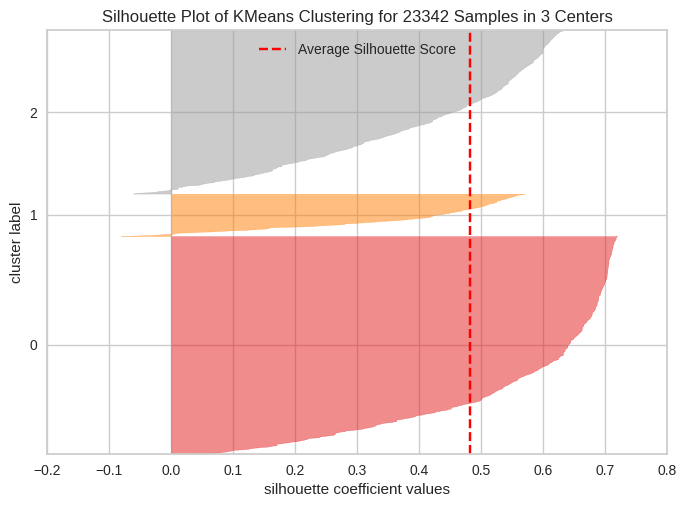

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 23342 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

k = 3

model = KMeans(n_clusters=k, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)
visualizer.show()